# **LOAD DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv("C:/Intel/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [15]:
df.shape

(4600, 18)

In [16]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

# **DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [17]:
df["date"]=pd.to_datetime(df["date"])

In [79]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Checking the null values

In [239]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Checking the skewness of data

In [7]:
df.price.skew()

24.790932561757053

In [8]:
df.bedrooms.skew()

0.4564466330191457

<Axes: xlabel='bedrooms', ylabel='Density'>

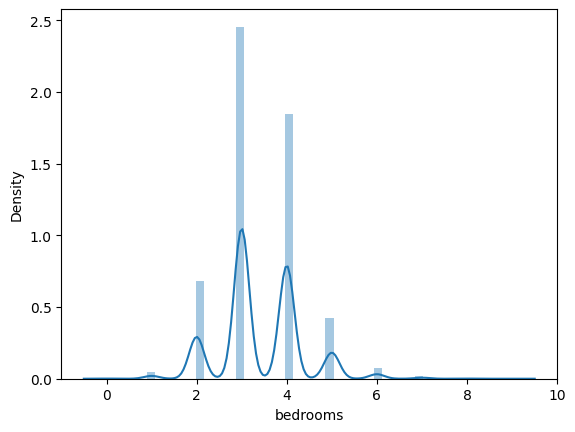

In [9]:
sns.distplot(df['bedrooms'])

In [18]:
df.bathrooms.skew()

0.6160327233508812

<Axes: xlabel='bathrooms', ylabel='Density'>

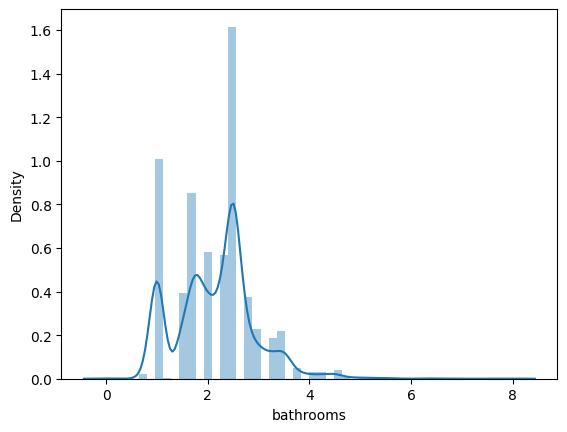

In [11]:
sns.distplot(df['bathrooms'])

In [19]:
df.sqft_living.skew()

1.723513270622118

<Axes: xlabel='sqft_living', ylabel='Density'>

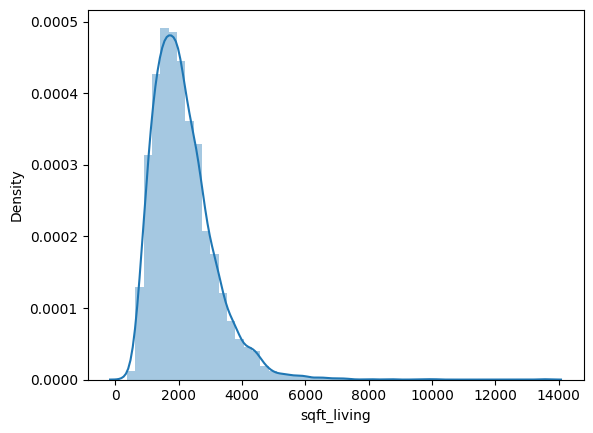

In [14]:
sns.distplot(df['sqft_living'])

In [15]:
df.floors.skew()

0.5514406463488161

<Axes: xlabel='floors', ylabel='Density'>

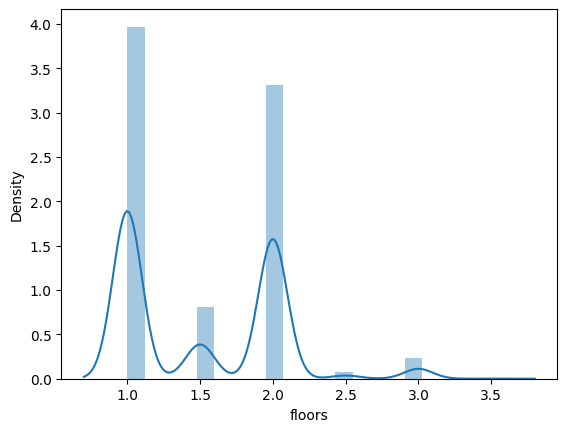

In [16]:
sns.distplot(df['floors'])

In [20]:
df.waterfront.skew()

11.682900924983505

In [18]:
df.view.skew()

3.341586380673694

In [19]:
df.condition.skew()

0.9590676635009114

<Axes: xlabel='condition', ylabel='Density'>

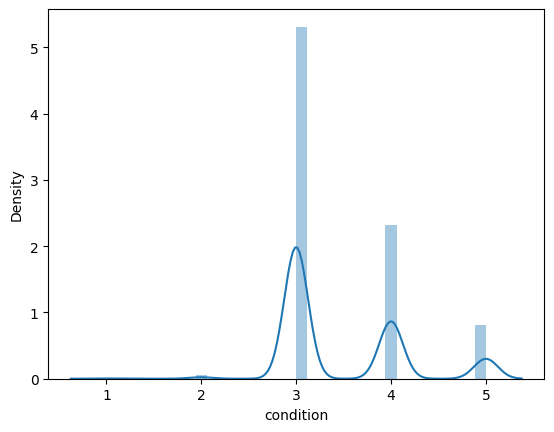

In [20]:
sns.distplot(df['condition'])

In [21]:
df.sqft_above.skew()

1.4942107479829443

<Axes: xlabel='sqft_above', ylabel='Density'>

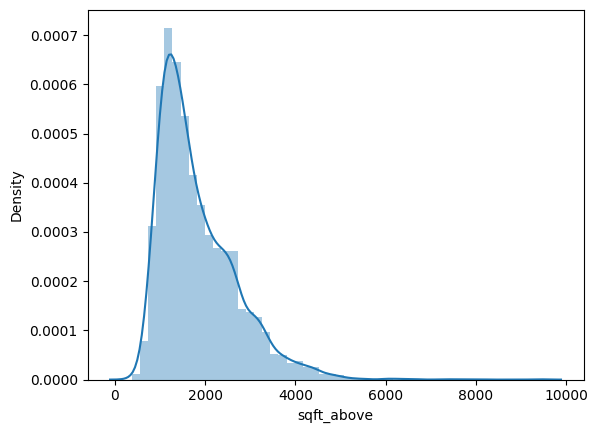

In [22]:
sns.distplot(df['sqft_above'])

In [23]:
df.sqft_basement.skew()

1.6427321922167097

<Axes: xlabel='sqft_basement', ylabel='Density'>

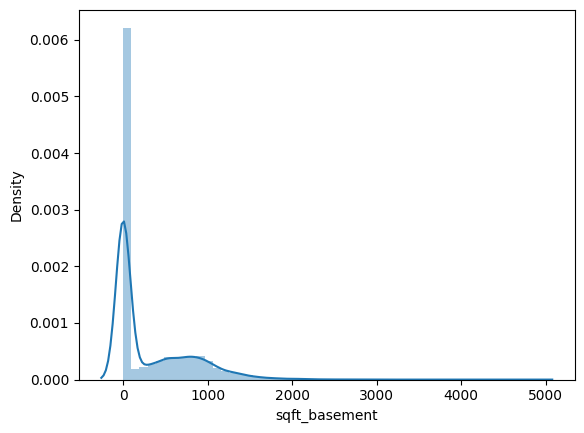

In [24]:
sns.distplot(df['sqft_basement'])

In [25]:
df.yr_built.skew()

-0.5021551899878874

<Axes: xlabel='yr_built', ylabel='Density'>

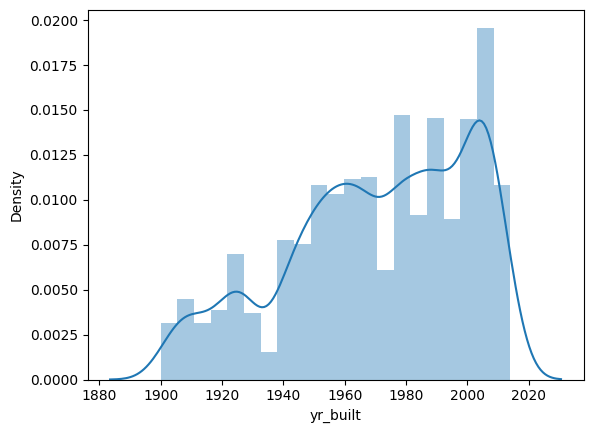

In [27]:
sns.distplot(df['yr_built'])

In [28]:
df.yr_renovated.skew()

0.38591870088297575

<Axes: xlabel='yr_renovated', ylabel='Density'>

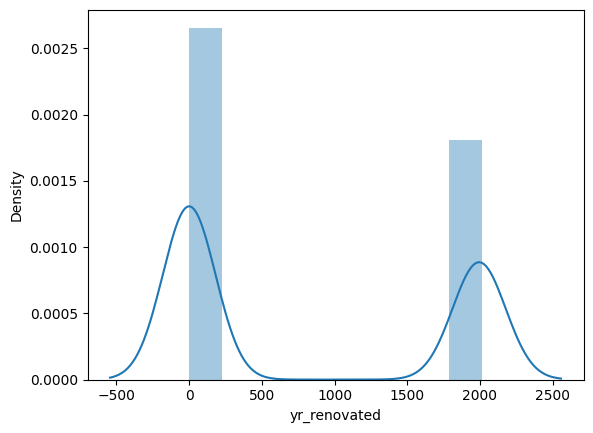

In [29]:
sns.distplot(df['yr_renovated'])

### Outliers removing and detection in `price`

<Axes: ylabel='price'>

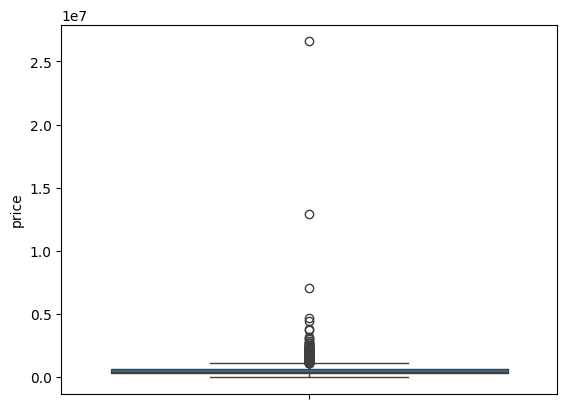

In [21]:
sns.boxplot(df['price'])

In [76]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

322875.0
654962.5
IQR is  332087.5
upper limit  1153093.75
lower limit  -175256.25
length of outliers on upper bound  240
length of outliers on lower bound  0


In [77]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(4360, 18)


#### Again checking the outlier in `price`

In [78]:
# finding the IQR
q1 = new_df['price'].quantile(0.25)
q3 = new_df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

315000.0
613000.0
IQR is  298000.0
upper limit  1060000.0
lower limit  -132000.0
length of outliers on upper bound  53
length of outliers on lower bound  0


In [79]:
df = new_df[new_df['price'] < upper_limit]
print(df.shape)

(4306, 18)


<Axes: ylabel='price'>

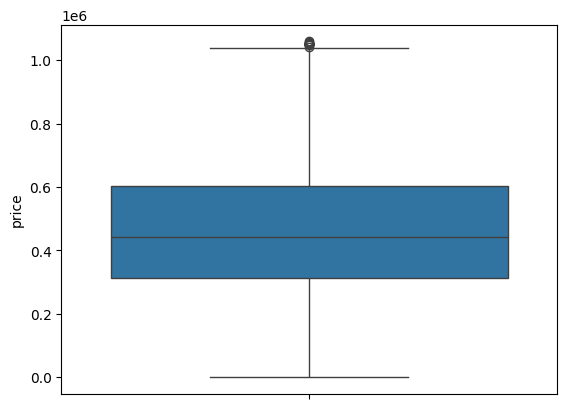

In [80]:
sns.boxplot(df['price'])

### Again applying on it `price`

In [81]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

313237.5
604000.0
IQR is  290762.5
upper limit  1040143.75
lower limit  -122906.25
length of outliers on upper bound  16
length of outliers on lower bound  0


In [82]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(4290, 18)


<Axes: ylabel='price'>

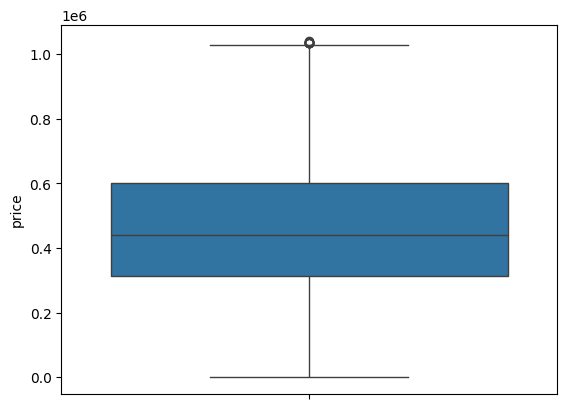

In [83]:
sns.boxplot(new_df['price'])

In [84]:
# finding the IQR
q1 = new_df['price'].quantile(0.25)
q3 = new_df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

312893.25
600000.0
IQR is  287106.75
upper limit  1030660.125
lower limit  -117766.875
length of outliers on upper bound  9
length of outliers on lower bound  0


In [85]:
df = new_df[new_df['price'] < upper_limit]
print(df.shape)

(4281, 18)


<Axes: ylabel='price'>

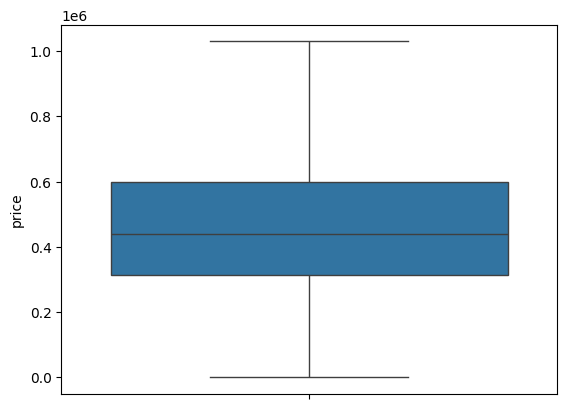

In [86]:
sns.boxplot(df['price'])

## Outlier detection and removing on `sqft_basement`

<Axes: ylabel='sqft_basement'>

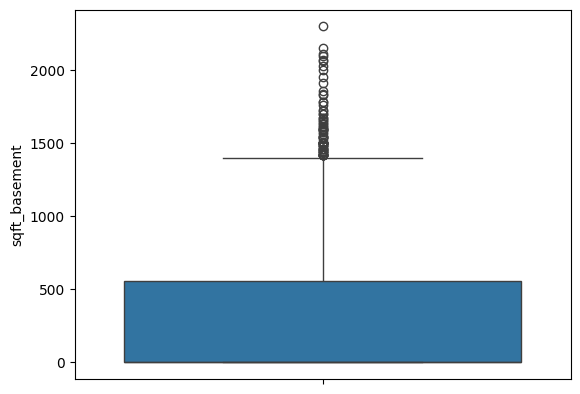

In [87]:
sns.boxplot(df['sqft_basement'])

In [88]:
# finding the IQR
q1 = df['sqft_basement'].quantile(0.25)
q3 = df['sqft_basement'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_basement'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_basement'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

0.0
560.0
IQR is  560.0
upper limit  1400.0
lower limit  -840.0
length of outliers on upper bound  68
length of outliers on lower bound  0


(4207, 18)


<Axes: ylabel='sqft_basement'>

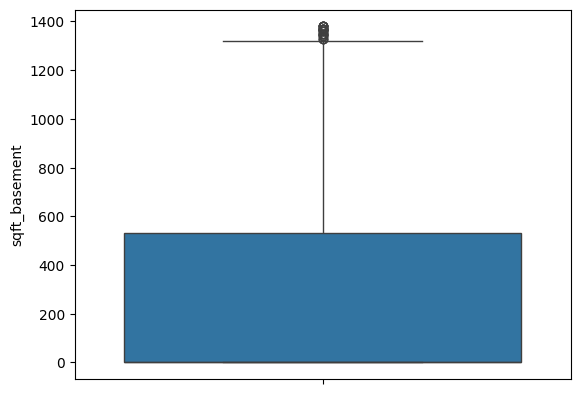

In [89]:
new_df = df[df['sqft_basement'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_basement'])

In [90]:
# finding the IQR
q1 = new_df['sqft_basement'].quantile(0.25)
q3 = new_df['sqft_basement'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_basement'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_basement'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

0.0
530.0
IQR is  530.0
upper limit  1325.0
lower limit  -795.0
length of outliers on upper bound  28
length of outliers on lower bound  0


### Cappin method

In [91]:
df['sqft_basement'] = new_df['sqft_basement'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))


<Axes: ylabel='sqft_basement'>

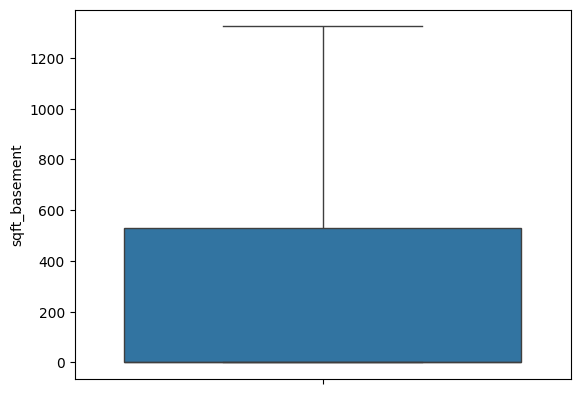

In [92]:
sns.boxplot(df['sqft_basement'])

In [93]:
df.shape

(4281, 18)

In [41]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Outliers detection and removing in `yr_renovated`

<Axes: ylabel='yr_renovated'>

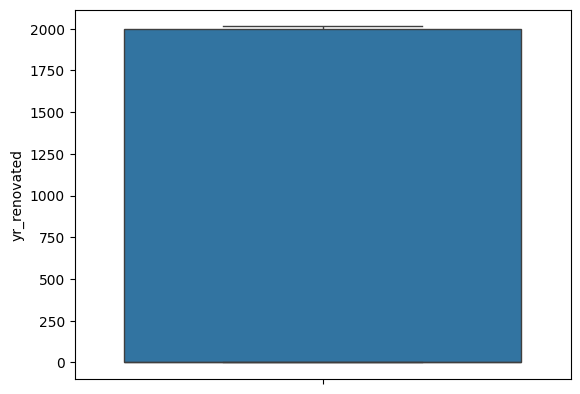

In [94]:
sns.boxplot(df['yr_renovated'])

In [95]:
# finding the IQR
q1 = df['sqft_basement'].quantile(0.25)
q3 = df['sqft_basement'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_basement'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_basement'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

0.0
530.0
IQR is  530.0
upper limit  1325.0
lower limit  -795.0
length of outliers on upper bound  0
length of outliers on lower bound  0


### Outlier removing and detection in `bathrooms`

<Axes: ylabel='bedrooms'>

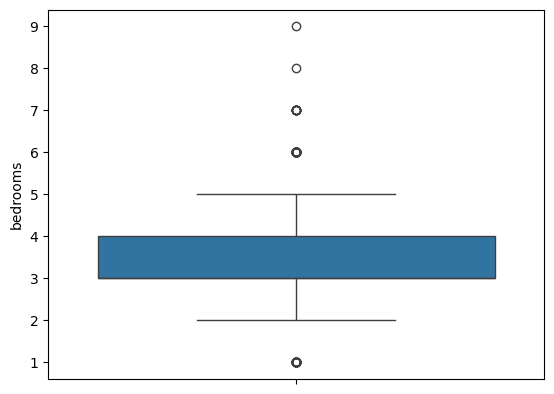

In [96]:
sns.boxplot(df['bedrooms'])

In [97]:
# finding the IQR
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['bedrooms'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['bedrooms'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

3.0
4.0
IQR is  1.0
upper limit  5.5
lower limit  1.5
length of outliers on upper bound  57
length of outliers on lower bound  38


In [98]:
new_df = df[(df['bedrooms'] > lower_limit) & (df['bedrooms'] < upper_limit)]
print(new_df.shape)

(4186, 18)


<Axes: ylabel='bedrooms'>

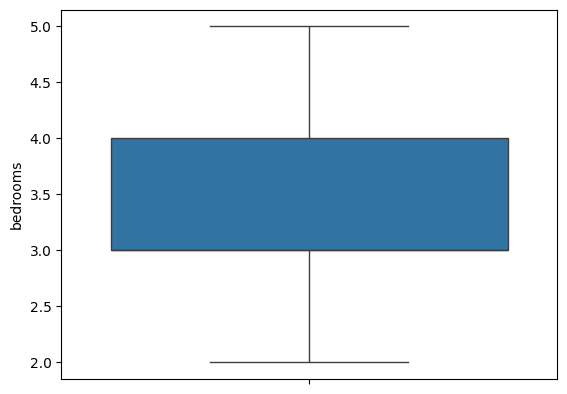

In [99]:
sns.boxplot(new_df['bedrooms'])

### Outlier detection and removing on bathrooms

<Axes: ylabel='bathrooms'>

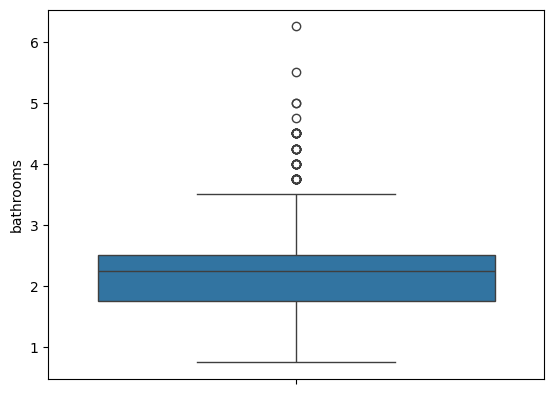

In [100]:
sns.boxplot(new_df['bathrooms'])

In [101]:
# finding the IQR
q1 = new_df['bathrooms'].quantile(0.25)
q3 = new_df['bathrooms'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['bathrooms'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['bathrooms'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1.75
2.5
IQR is  0.75
upper limit  3.625
lower limit  0.625
length of outliers on upper bound  52
length of outliers on lower bound  0


(4134, 18)


<Axes: ylabel='bathrooms'>

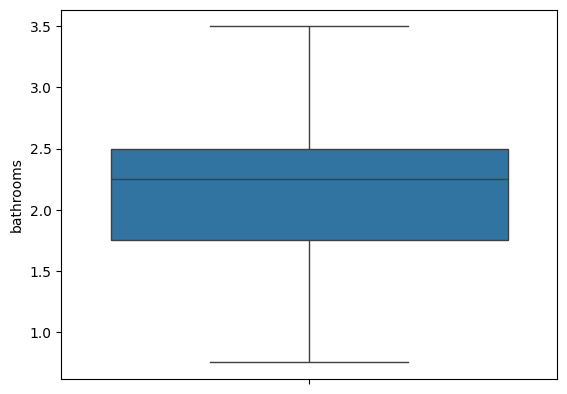

In [102]:
df = new_df[new_df['bathrooms'] < upper_limit]
print(df.shape)
sns.boxplot(df['bathrooms'])

### Outliers detection and removing in `sqft_living`

<Axes: ylabel='sqft_living'>

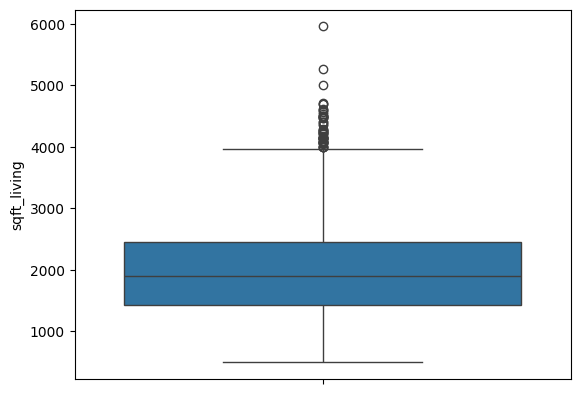

In [105]:
sns.boxplot(df['sqft_living'])

In [106]:
# finding the IQR
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_living'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_living'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1430.0
2450.0
IQR is  1020.0
upper limit  3980.0
lower limit  -100.0
length of outliers on upper bound  53
length of outliers on lower bound  0


(4081, 18)


<Axes: ylabel='sqft_living'>

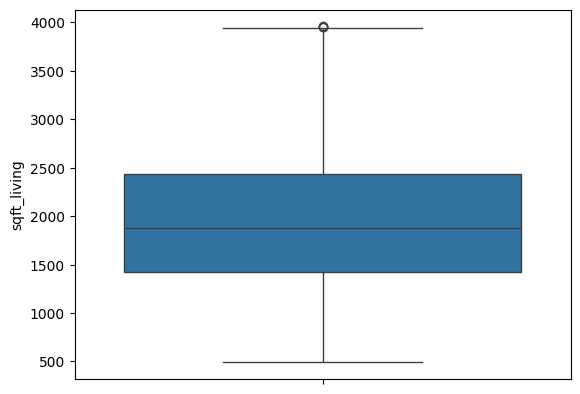

In [107]:
new_df = df[df['sqft_living'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_living'])

In [108]:
# finding the IQR
q1 = new_df['sqft_living'].quantile(0.25)
q3 = new_df['sqft_living'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_living'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_living'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1420.0
2430.0
IQR is  1010.0
upper limit  3945.0
lower limit  -95.0
length of outliers on upper bound  3
length of outliers on lower bound  0


(4078, 18)


<Axes: ylabel='sqft_living'>

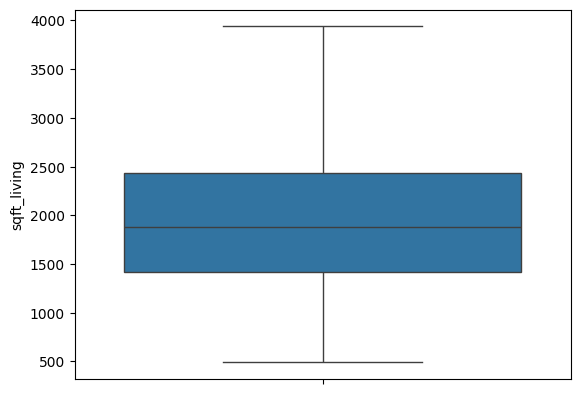

In [109]:
df = new_df[new_df['sqft_living'] < upper_limit]
print(df.shape)
sns.boxplot(df['sqft_living'])

### Removing and detection outliers in `sqft_lot`

<Axes: ylabel='sqft_lot'>

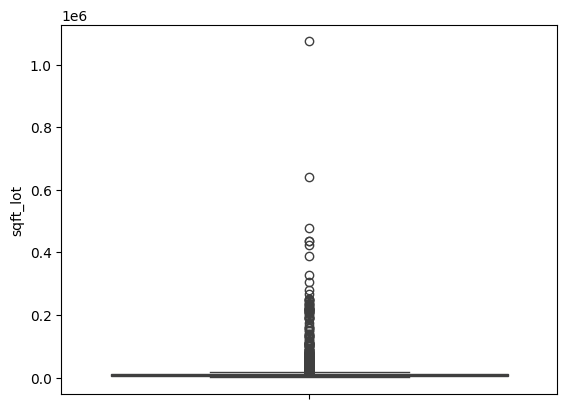

In [110]:
sns.boxplot(df['sqft_lot'])

In [111]:
# finding the IQR
q1 = df['sqft_lot'].quantile(0.25)
q3 = df['sqft_lot'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_lot'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_lot'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

5000.0
10350.0
IQR is  5350.0
upper limit  18375.0
lower limit  -3025.0
length of outliers on upper bound  451
length of outliers on lower bound  0


(3627, 18)


<Axes: ylabel='sqft_lot'>

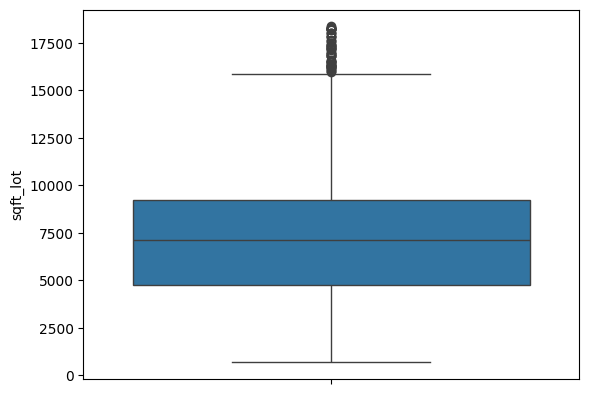

In [112]:
new_df = df[df['sqft_lot'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_lot'])

In [113]:
# finding the IQR
q1 = new_df['sqft_lot'].quantile(0.25)
q3 = new_df['sqft_lot'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_lot'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_lot'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

4760.0
9227.5
IQR is  4467.5
upper limit  15928.75
lower limit  -1941.25
length of outliers on upper bound  66
length of outliers on lower bound  0


(3561, 18)


<Axes: ylabel='sqft_lot'>

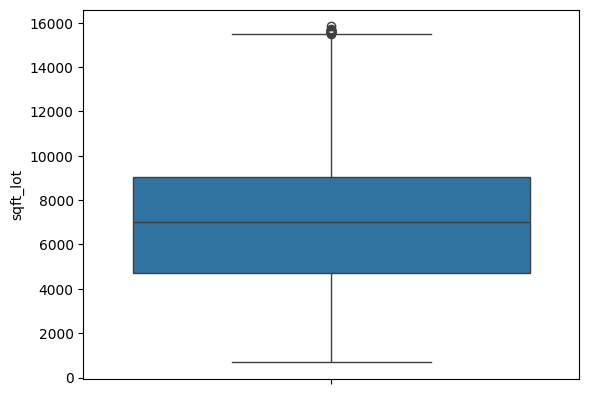

In [115]:
df = new_df[new_df['sqft_lot'] < upper_limit]
print(df.shape)
sns.boxplot(df['sqft_lot'])

In [116]:
# finding the IQR
q1 = df['sqft_lot'].quantile(0.25)
q3 = df['sqft_lot'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_lot'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_lot'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

4725.0
9039.0
IQR is  4314.0
upper limit  15510.0
lower limit  -1746.0
length of outliers on upper bound  15
length of outliers on lower bound  0


In [1]:
if (0.1 + 0.2 == 0.3):
    print('True')
else:
    print('False')

False


(3546, 18)


<Axes: ylabel='sqft_lot'>

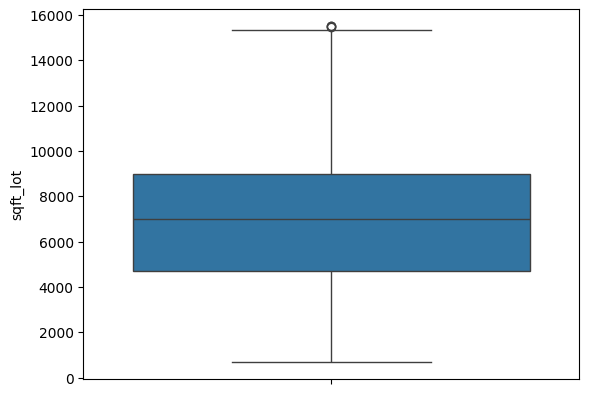

In [117]:
new_df = df[df['sqft_lot'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_lot'])

In [118]:
# finding the IQR
q1 = new_df['sqft_lot'].quantile(0.25)
q3 = new_df['sqft_lot'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_lot'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_lot'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

4704.5
9000.0
IQR is  4295.5
upper limit  15443.25
lower limit  -1738.75
length of outliers on upper bound  3
length of outliers on lower bound  0


(3543, 18)


<Axes: ylabel='sqft_lot'>

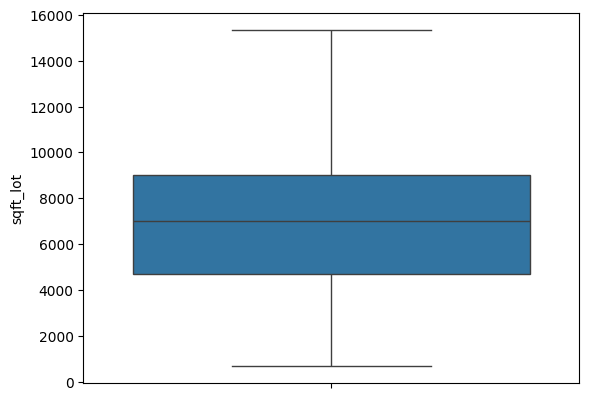

In [119]:
new_df = new_df[new_df['sqft_lot'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_lot'])

### Removing and detection of outliers in `floors`

<Axes: ylabel='floors'>

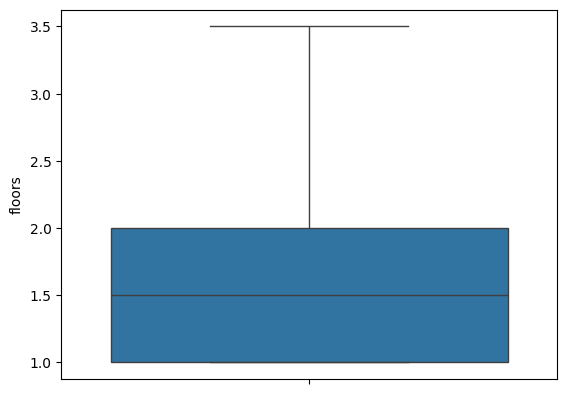

In [121]:
sns.boxplot(new_df['floors'])

### Outlier detection and removing on `view`

<Axes: ylabel='floors'>

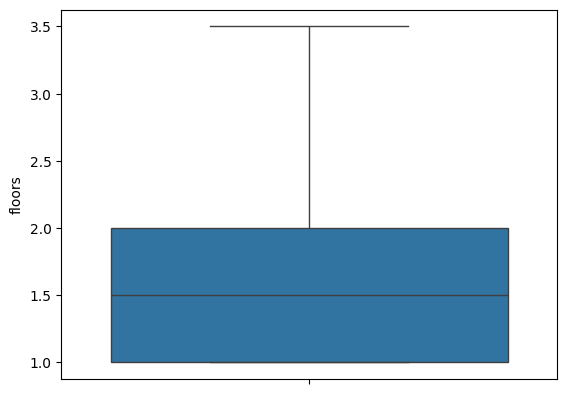

In [122]:
sns.boxplot(new_df['floors'])

### Outlier detection and removing in yr_built

<Axes: ylabel='yr_built'>

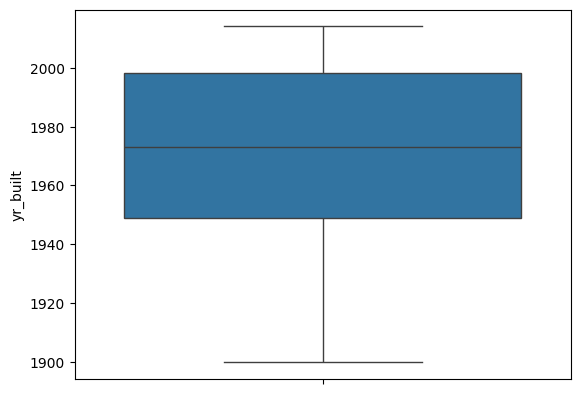

In [123]:
sns.boxplot(new_df['yr_built'])

<Axes: ylabel='yr_renovated'>

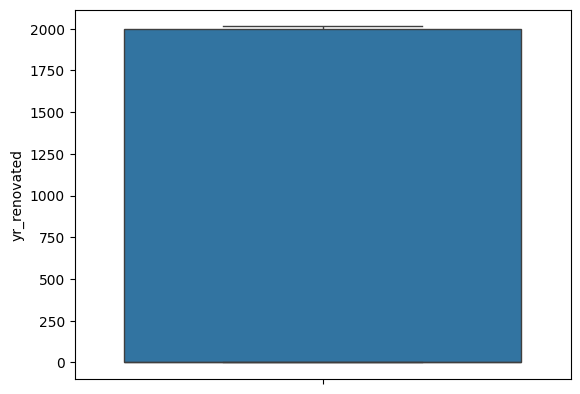

In [124]:
sns.boxplot(new_df['yr_renovated'])

In [125]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3543 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3543 non-null   object 
 1   price          3543 non-null   float64
 2   bedrooms       3543 non-null   float64
 3   bathrooms      3543 non-null   float64
 4   sqft_living    3543 non-null   int64  
 5   sqft_lot       3543 non-null   int64  
 6   floors         3543 non-null   float64
 7   waterfront     3543 non-null   int64  
 8   view           3543 non-null   int64  
 9   condition      3543 non-null   int64  
 10  sqft_above     3543 non-null   int64  
 11  sqft_basement  3518 non-null   float64
 12  yr_built       3543 non-null   int64  
 13  yr_renovated   3543 non-null   int64  
 14  street         3543 non-null   object 
 15  city           3543 non-null   object 
 16  statezip       3543 non-null   object 
 17  country        3543 non-null   object 
dtypes: float64(5)

In [126]:
new_df.shape

(3543, 18)

In [127]:
new_df.to_csv('USA_Housing_prediction.csv')

In [234]:
df = pd.read_csv('USA_Housing_prediction.csv')

In [235]:
df.shape

(3543, 19)

In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### Drop the irrelevent features

In [236]:
df.drop(columns=['Unnamed: 0','date'],inplace=True)

In [237]:
df.shape

(3543, 17)

In [238]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0.0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0.0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000.0,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800.0,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0.0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


### Checking the null values

In [239]:
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement    25
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [169]:
df.isnull().sum().sum()

25

In [240]:
df.dropna(inplace=True)

In [241]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [243]:
from sklearn.preprocessing import LabelEncoder
mapping = {}
cat_col = ['city','statezip','country','street']
for col in cat_col:
    le = LabelEncoder()
    # fit and transform the column
    df[col] = le.fit_transform(df[col])
    # store the mapping for each column
    mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))

for feature,mapping in mapping.items():
    print(f"{feature} : {mapping}")

city : {'Algona': 0, 'Auburn': 1, 'Beaux Arts Village': 2, 'Bellevue': 3, 'Black Diamond': 4, 'Bothell': 5, 'Burien': 6, 'Carnation': 7, 'Clyde Hill': 8, 'Covington': 9, 'Des Moines': 10, 'Duvall': 11, 'Enumclaw': 12, 'Fall City': 13, 'Federal Way': 14, 'Inglewood-Finn Hill': 15, 'Issaquah': 16, 'Kenmore': 17, 'Kent': 18, 'Kirkland': 19, 'Lake Forest Park': 20, 'Maple Valley': 21, 'Mercer Island': 22, 'Milton': 23, 'Newcastle': 24, 'Normandy Park': 25, 'North Bend': 26, 'Pacific': 27, 'Preston': 28, 'Ravensdale': 29, 'Redmond': 30, 'Renton': 31, 'Sammamish': 32, 'SeaTac': 33, 'Seattle': 34, 'Shoreline': 35, 'Skykomish': 36, 'Snoqualmie': 37, 'Snoqualmie Pass': 38, 'Tukwila': 39, 'Vashon': 40, 'Woodinville': 41, 'Yarrow Point': 42}
statezip : {'WA 98001': 0, 'WA 98002': 1, 'WA 98003': 2, 'WA 98004': 3, 'WA 98005': 4, 'WA 98006': 5, 'WA 98007': 6, 'WA 98008': 7, 'WA 98010': 8, 'WA 98011': 9, 'WA 98014': 10, 'WA 98019': 11, 'WA 98022': 12, 'WA 98023': 13, 'WA 98024': 14, 'WA 98027': 15, '

### Outlier detection

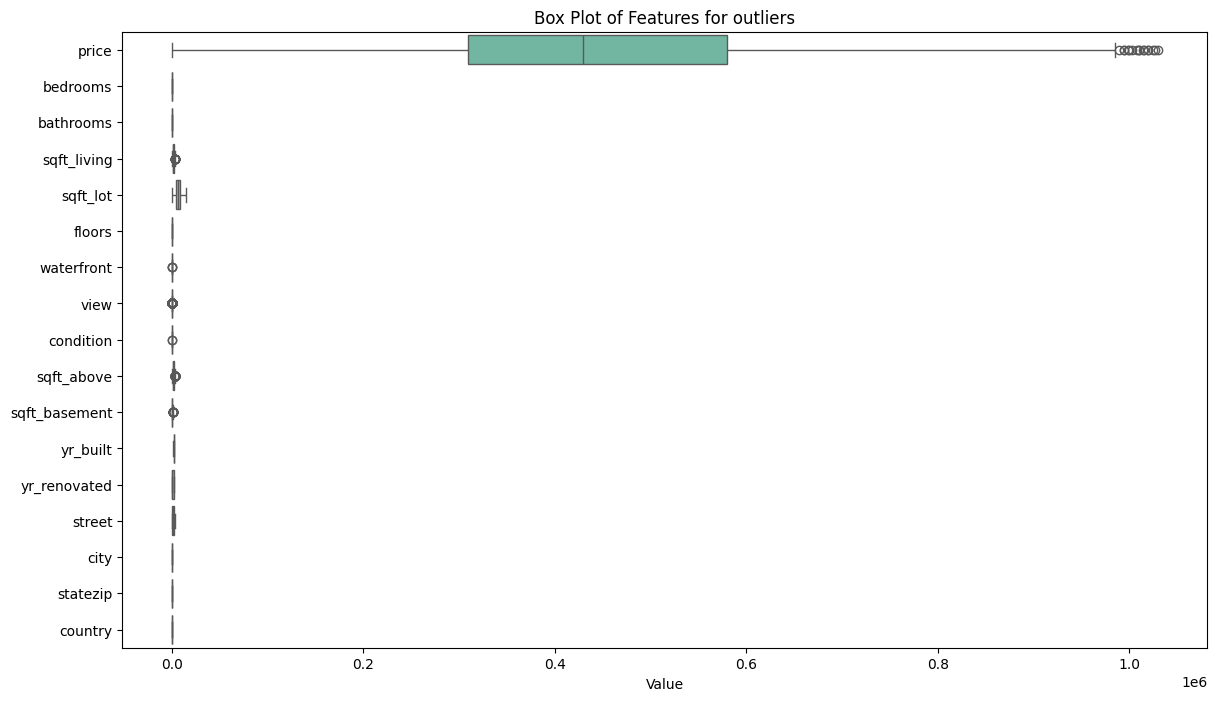

<Figure size 640x480 with 0 Axes>

In [244]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()


### Again applying outlier method on `price`

<Axes: ylabel='price'>

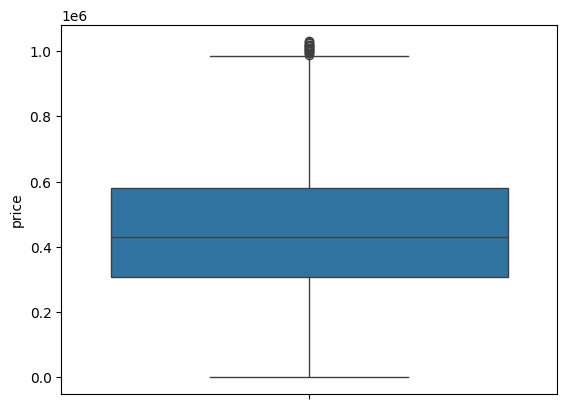

In [245]:
sns.boxplot(df['price'])

In [246]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

309000.0
580000.0
IQR is  271000.0
upper limit  986500.0
lower limit  -97500.0
length of outliers on upper bound  16
length of outliers on lower bound  0


(3502, 17)


<Axes: ylabel='price'>

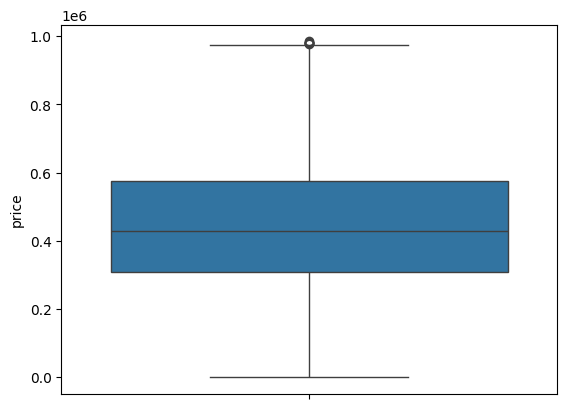

In [247]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['price'])

In [248]:
# finding the IQR
q1 = new_df['price'].quantile(0.25)
q3 = new_df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

308848.07692325
575887.5
IQR is  267039.42307675
upper limit  976446.634615125
lower limit  -91711.05769187503
length of outliers on upper bound  7
length of outliers on lower bound  0


(3495, 17)


<Axes: ylabel='price'>

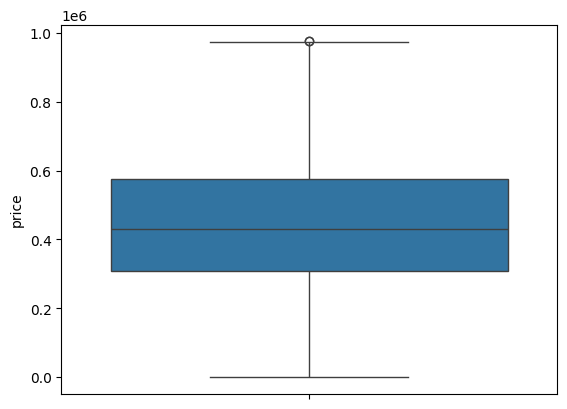

In [249]:
df = new_df[new_df['price'] < upper_limit]
print(df.shape)
sns.boxplot(df['price'])

In [250]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

308333.33333349996
575000.0
IQR is  266666.66666650004
upper limit  974999.99999975
lower limit  -91666.6666662501
length of outliers on upper bound  2
length of outliers on lower bound  0


(3493, 17)


<Axes: ylabel='price'>

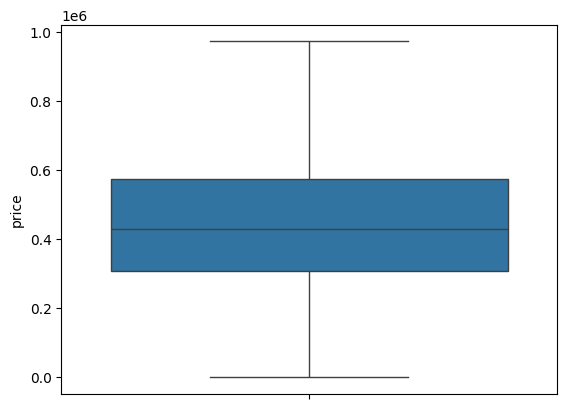

In [251]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['price'])

# ML Data pipeline

In [252]:
new_df.to_csv('Housing_Prediction.csv')

In [411]:
df = pd.read_csv('Housing_Prediction.csv')

In [412]:
df.shape

(3493, 18)

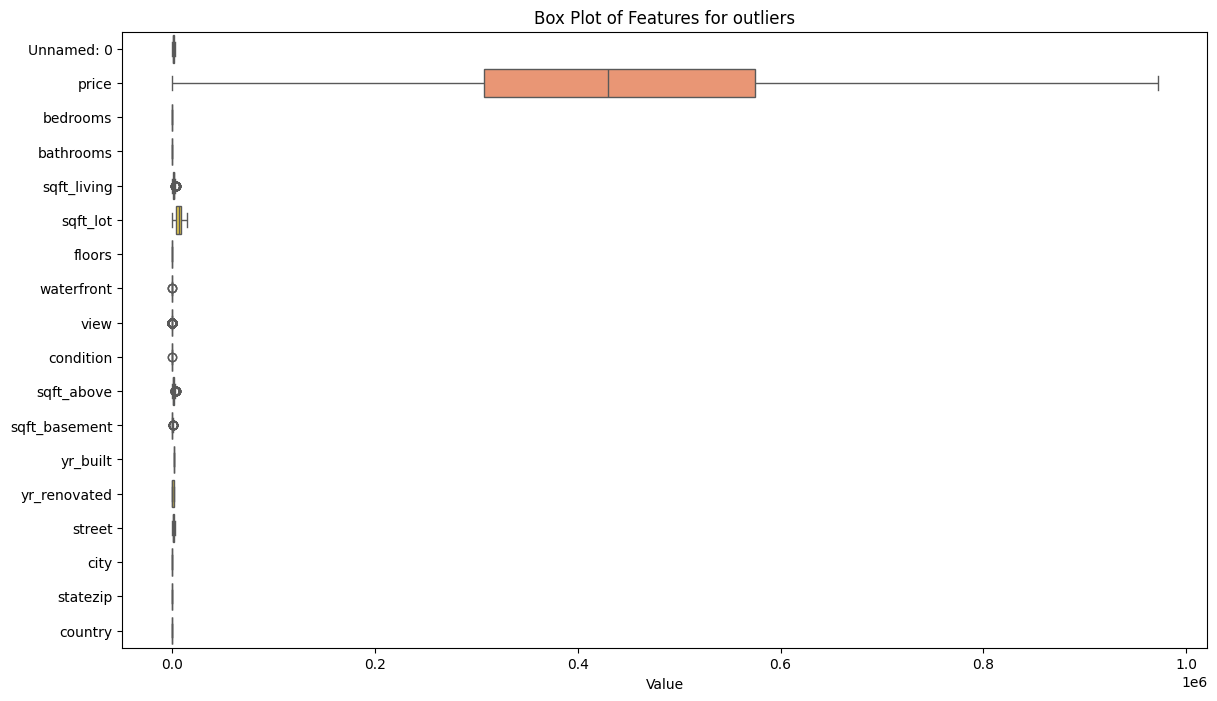

<Figure size 640x480 with 0 Axes>

In [413]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()


In [373]:
df.shape

(3493, 18)

In [374]:
df.duplicated().sum()

0

In [375]:
df.isnull().sum()

Unnamed: 0       0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [376]:
df.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: ylabel='sqft_living'>

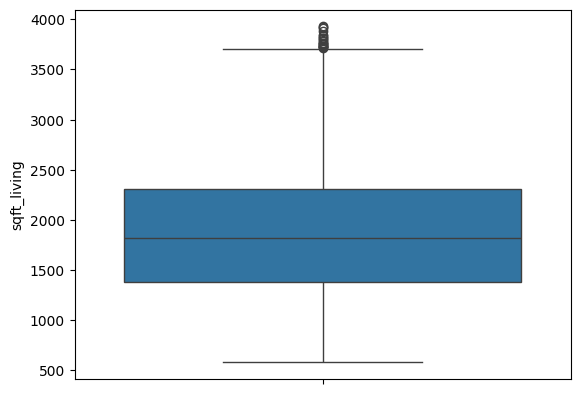

In [415]:
sns.boxplot(df['sqft_living'])

<Axes: ylabel='sqft_above'>

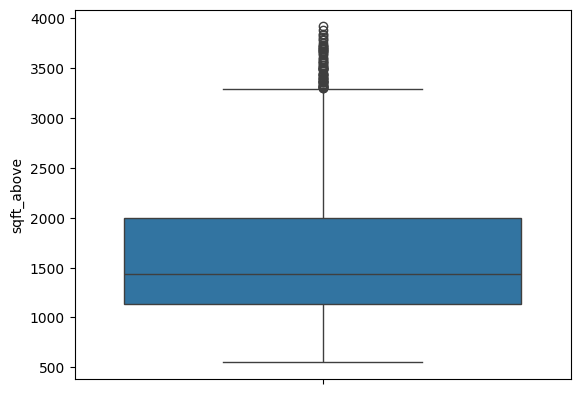

In [414]:
sns.boxplot(df['sqft_above'])

### Now again applying outlier removing and detection method on them

In [416]:
# finding the IQR
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_living'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_living'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1380.0
2310.0
IQR is  930.0
upper limit  3705.0
lower limit  -15.0
length of outliers on upper bound  20
length of outliers on lower bound  0


(3473, 18)


<Axes: ylabel='sqft_living'>

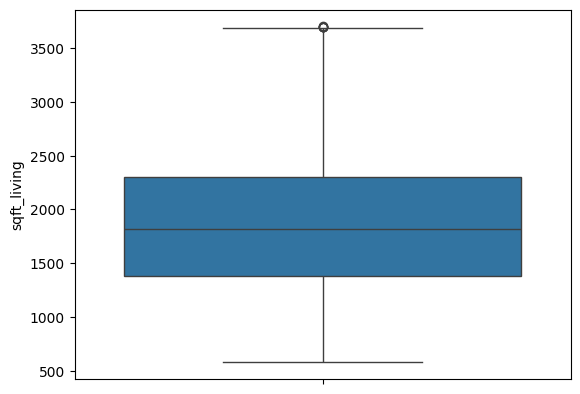

In [417]:
new_df = df[df['sqft_living'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_living'])

In [418]:
# finding the IQR
q1 = new_df['sqft_living'].quantile(0.25)
q3 = new_df['sqft_living'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_living'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_living'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1380.0
2300.0
IQR is  920.0
upper limit  3680.0
lower limit  0.0
length of outliers on upper bound  5
length of outliers on lower bound  0


(3467, 18)


<Axes: ylabel='sqft_living'>

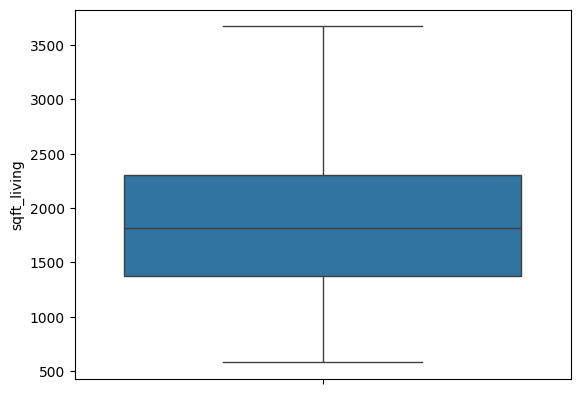

In [419]:
df = new_df[new_df['sqft_living'] < upper_limit]
print(df.shape)
sns.boxplot(df['sqft_living'])

In [420]:
# finding the IQR
q1 = df['sqft_above'].quantile(0.25)
q3 = df['sqft_above'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_above'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_above'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1140.0
1980.0
IQR is  840.0
upper limit  3240.0
lower limit  -120.0
length of outliers on upper bound  63
length of outliers on lower bound  0


(3400, 18)


<Axes: ylabel='sqft_above'>

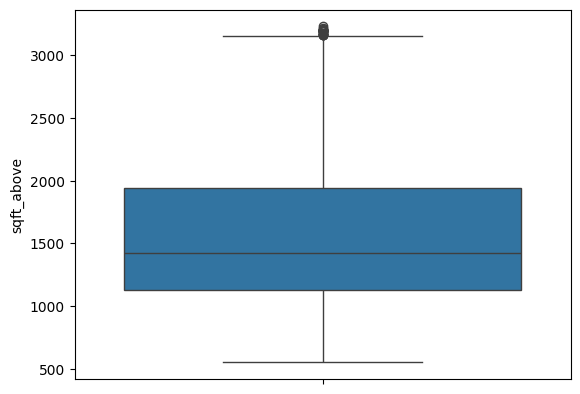

In [422]:
new_df = df[df['sqft_above'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_above'])

In [423]:
# finding the IQR
q1 = new_df['sqft_above'].quantile(0.25)
q3 = new_df['sqft_above'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_above'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_above'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1130.0
1940.0
IQR is  810.0
upper limit  3155.0
lower limit  -85.0
length of outliers on upper bound  22
length of outliers on lower bound  0


(3378, 18)


<Axes: ylabel='sqft_above'>

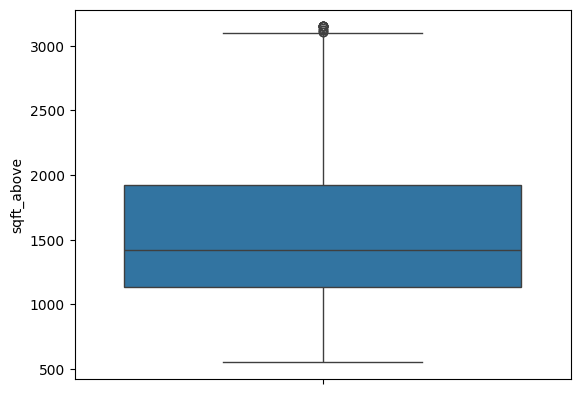

In [424]:
df = new_df[new_df['sqft_above'] < upper_limit]
print(df.shape)
sns.boxplot(df['sqft_above'])

In [425]:
# finding the IQR
q1 = df['sqft_above'].quantile(0.25)
q3 = df['sqft_above'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_above'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_above'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1130.0
1920.0
IQR is  790.0
upper limit  3105.0
lower limit  -55.0
length of outliers on upper bound  13
length of outliers on lower bound  0


(3365, 18)


<Axes: ylabel='sqft_above'>

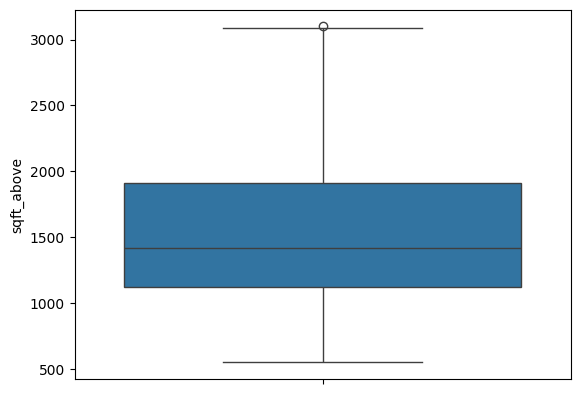

In [426]:
new_df = df[df['sqft_above'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['sqft_above'])

In [427]:
# finding the IQR
q1 = new_df['sqft_above'].quantile(0.25)
q3 = new_df['sqft_above'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['sqft_above'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['sqft_above'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1120.0
1910.0
IQR is  790.0
upper limit  3095.0
lower limit  -65.0
length of outliers on upper bound  1
length of outliers on lower bound  0


(3364, 18)


<Axes: ylabel='sqft_above'>

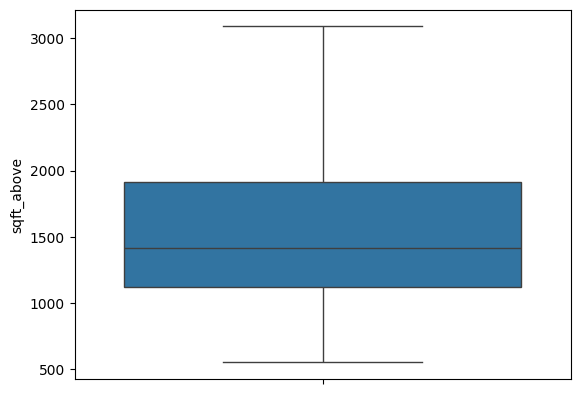

In [428]:
df = new_df[new_df['sqft_above'] < upper_limit]
print(df.shape)
sns.boxplot(df['sqft_above'])

<Axes: ylabel='condition'>

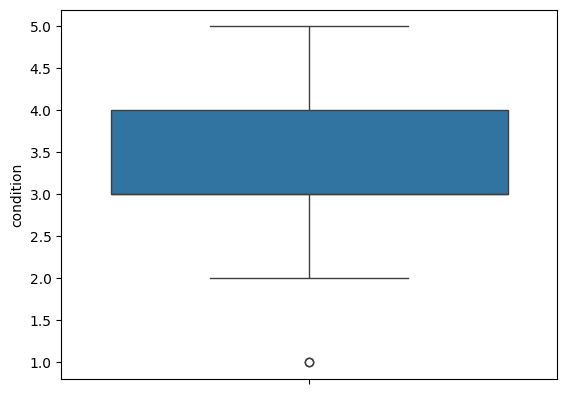

In [429]:
sns.boxplot(df['condition'])

In [430]:
# finding the IQR
q1 = df['condition'].quantile(0.25)
q3 = df['condition'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['condition'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['condition'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

3.0
4.0
IQR is  1.0
upper limit  5.5
lower limit  1.5
length of outliers on upper bound  0
length of outliers on lower bound  2


(3362, 18)


<Axes: ylabel='condition'>

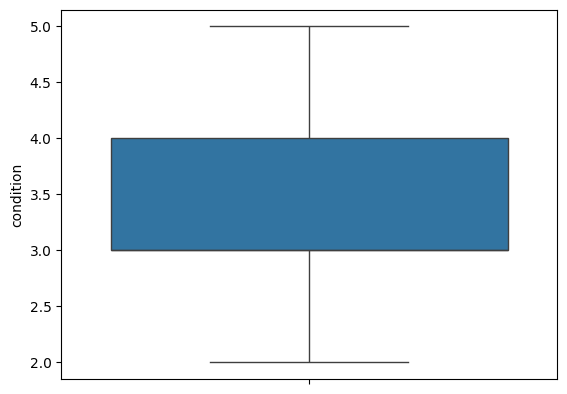

In [431]:
new_df = df[df['condition'] > lower_limit]
print(new_df.shape)
sns.boxplot(new_df['condition'])

In [432]:
new_df.isnull().sum()

Unnamed: 0       0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

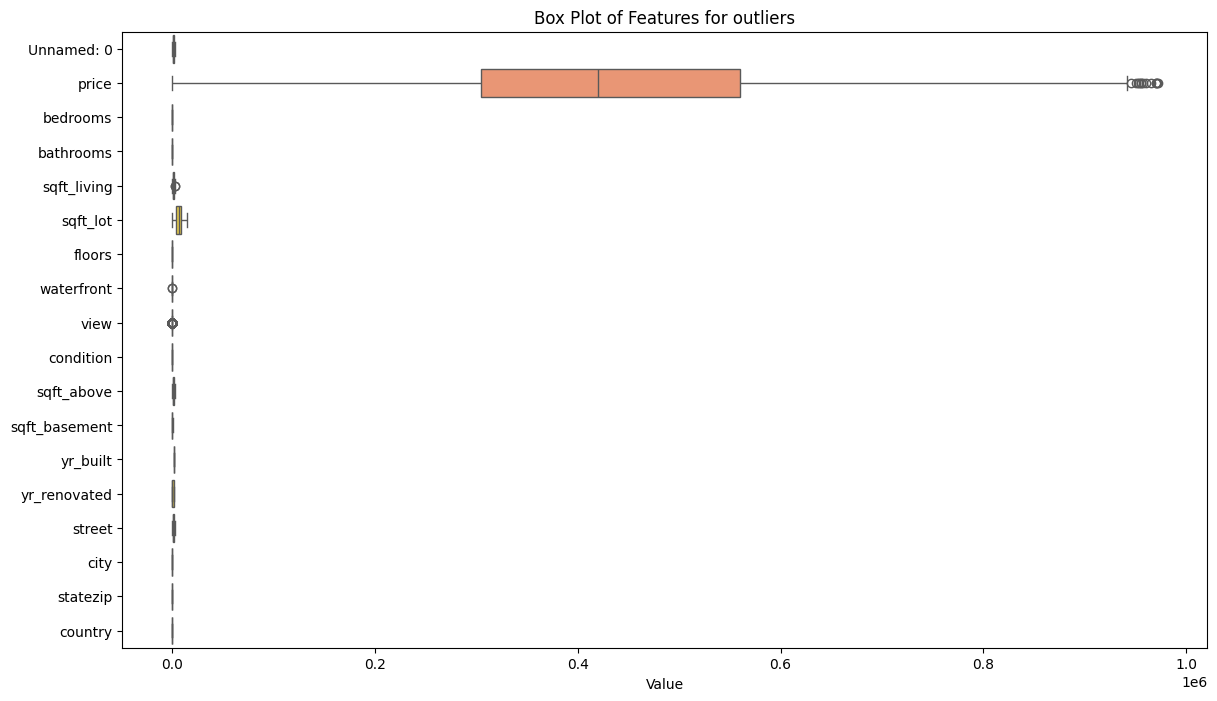

<Figure size 640x480 with 0 Axes>

In [434]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()


In [437]:
new_df.to_csv('Mlpipeline_USA_housing.csv')

# Real Data

In [571]:
df = pd.read_csv('Mlpipeline_USA_housing.csv')

In [523]:
df.head()

,Unnamed: 0.1,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0.0,1955,2005,1161,35,61,0
1,1,1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0.0,1966,0,1726,18,25,0
2,2,2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000.0,1963,0,3242,3,7,0
3,3,3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800.0,1976,1992,3318,30,30,0
4,4,4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0.0,1938,1994,2648,34,53,0


In [572]:
df.shape

(3362, 19)

In [573]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [574]:
df.shape

(3362, 17)

In [575]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0.0,1955,2005,1161,35,61,0
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0.0,1966,0,1726,18,25,0
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000.0,1963,0,3242,3,7,0
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800.0,1976,1992,3318,30,30,0
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0.0,1938,1994,2648,34,53,0


In [576]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<Axes: ylabel='price'>

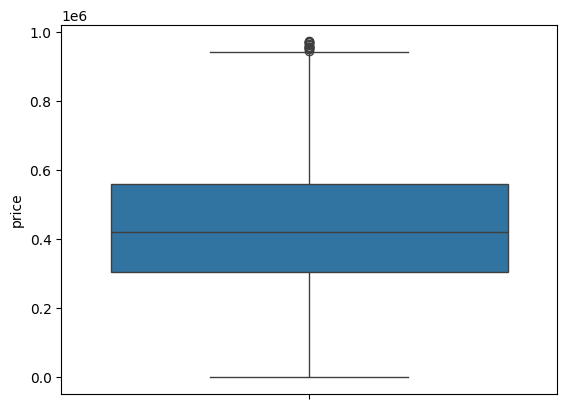

In [577]:
sns.boxplot(df['price'])

In [579]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

304750.0
560000.0
IQR is  255250.0
upper limit  942875.0
lower limit  -78125.0
length of outliers on upper bound  13
length of outliers on lower bound  0


#### capping method

In [580]:
# Replace outliers with the upper limit
df.loc[df['price'] > upper_limit, 'price'] = upper_limit

<Axes: ylabel='price'>

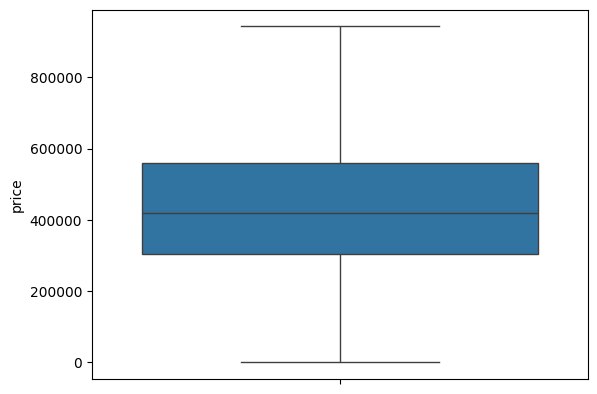

In [581]:
sns.boxplot(df['price'])

In [582]:
df.shape

(3362, 17)

<Axes: ylabel='sqft_living'>

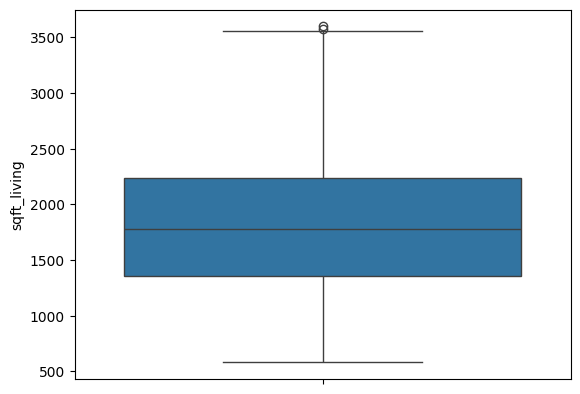

In [583]:
sns.boxplot(df['sqft_living'])

In [584]:
# finding the IQR
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['sqft_living'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['sqft_living'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1360.0
2240.0
IQR is  880.0
upper limit  3560.0
lower limit  40.0
length of outliers on upper bound  2
length of outliers on lower bound  0


In [585]:
df.loc[df['sqft_living'] > upper_limit, 'sqft_living'] = upper_limit

<Axes: ylabel='sqft_living'>

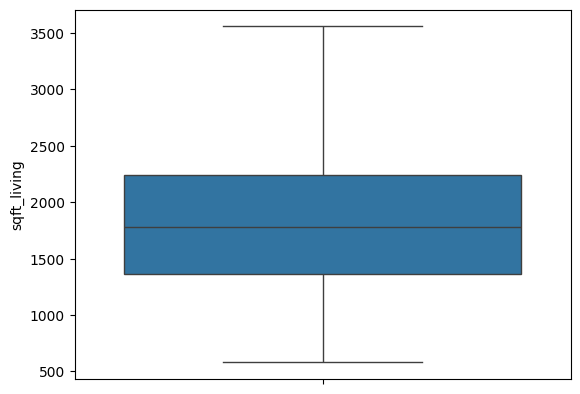

In [586]:
sns.boxplot(df['sqft_living'])

<Axes: ylabel='sqft_basement'>

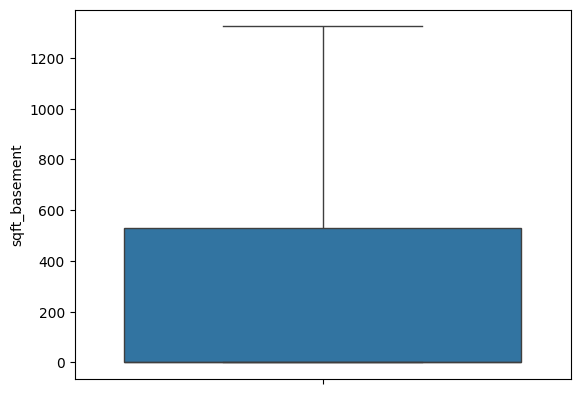

### Heatmap for correlation


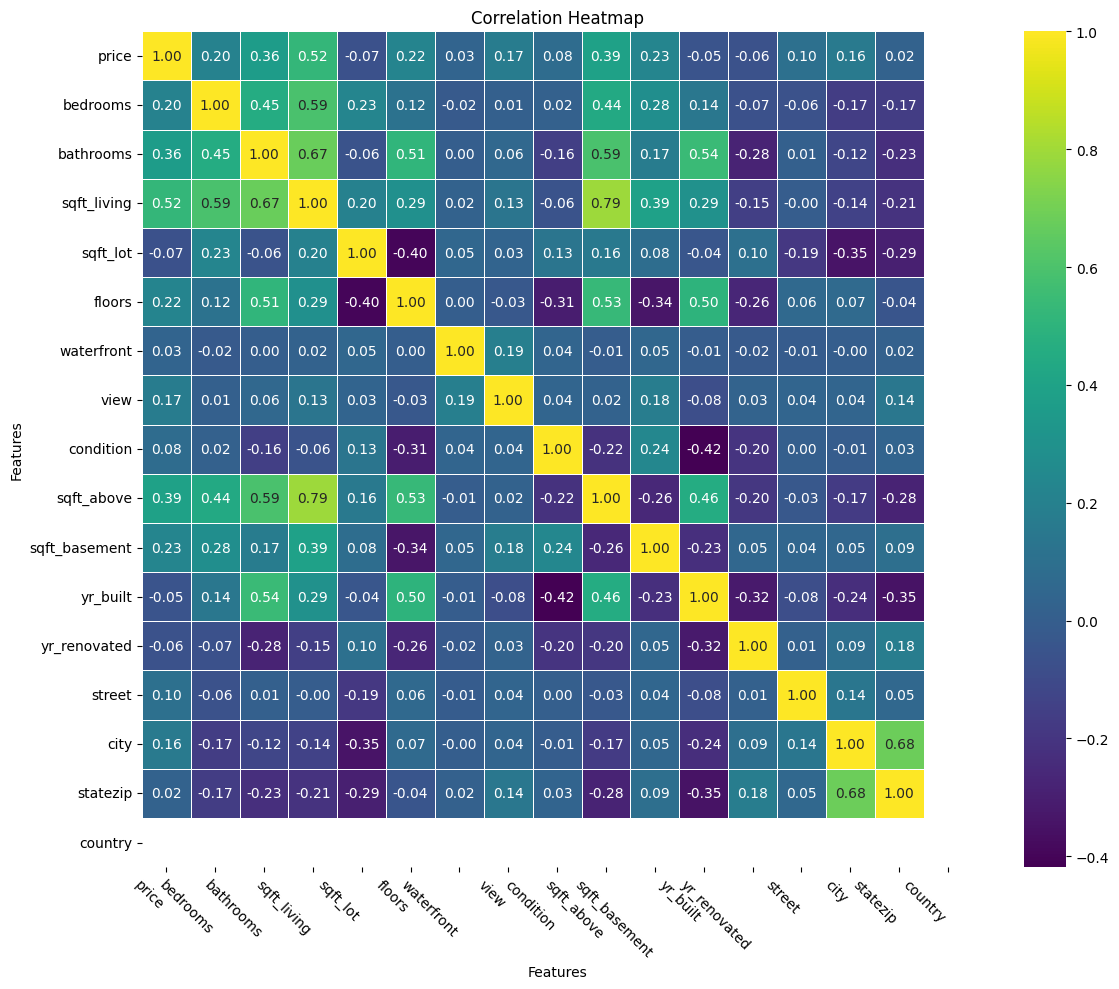

In [591]:
# Compute the correlation matrix
corr = df.corr()

# Create a new figure for plotting
plt.figure(figsize=(12, 10))  # Set the figure size

# Create the heatmap with Seaborn
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)  # Customize the plot

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Dropo all the irrelevent features

In [594]:
df.drop(columns=['waterfront','street','country','sqft_lot','yr_renovated'],inplace=True)

### Main File

In [596]:
df.to_csv("USA_Housing_Prediction.csv")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler

In [3]:
df = pd.read_csv("USA_Housing_Prediction.csv")

In [4]:
df.shape

(3362, 13)

In [45]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,yr_built,city,statezip
0,0,313000.0,3.0,1.50,1340,1.5,0,3,1340,0.0,1955,35,61
1,1,342000.0,3.0,2.00,1930,1.0,0,4,1930,0.0,1966,18,25
2,2,420000.0,3.0,2.25,2000,1.0,0,4,1000,1000.0,1963,3,7
3,3,550000.0,4.0,2.50,1940,1.0,0,4,1140,800.0,1976,30,30
4,4,490000.0,2.0,1.00,880,1.0,0,3,880,0.0,1938,34,53


In [77]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [78]:
pd.set_option('display.max_rows',None)

In [79]:
df['price'].value_counts(True)

price
300000.000000    0.011600
400000.000000    0.007733
440000.000000    0.007733
0.000000         0.007436
435000.000000    0.007139
525000.000000    0.007139
415000.000000    0.007139
350000.000000    0.006544
530000.000000    0.006544
250000.000000    0.006544
345000.000000    0.006544
405000.000000    0.006246
500000.000000    0.006246
450000.000000    0.006246
550000.000000    0.005949
425000.000000    0.005949
385000.000000    0.005949
475000.000000    0.005949
600000.000000    0.005949
330000.000000    0.005949
320000.000000    0.005651
325000.000000    0.005651
560000.000000    0.005354
650000.000000    0.005354
375000.000000    0.005354
430000.000000    0.005354
535000.000000    0.005057
310000.000000    0.005057
270000.000000    0.005057
235000.000000    0.005057
210000.000000    0.004759
245000.000000    0.004759
285000.000000    0.004759
315000.000000    0.004462
480000.000000    0.004462
260000.000000    0.004462
280000.000000    0.004462
580000.000000    0.004462
295000

# **ML**

In [80]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import sklearn.metrics as metrics

### Separate the independent and dependent features

In [81]:
x=df.drop('price',axis=1)
y=df["price"]

In [82]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,yr_built,city,statezip
0,3.0,1.50,1340,1.5,0,3,1340,0.0,1955,35,61
1,3.0,2.00,1930,1.0,0,4,1930,0.0,1966,18,25
2,3.0,2.25,2000,1.0,0,4,1000,1000.0,1963,3,7
3,4.0,2.50,1940,1.0,0,4,1140,800.0,1976,30,30
4,2.0,1.00,880,1.0,0,3,880,0.0,1938,34,53


In [83]:
y.head()

0    313000.0
1    342000.0
2    420000.0
3    550000.0
4    490000.0
Name: price, dtype: float64

### Splitting the data into train and test.
- training data = 70%
- testing data = 30%

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2689, 11), (2689,), (673, 11), (673,))

In [56]:
x_train.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,yr_built,city,statezip
1334,3.0,2.25,1870,1.0,0,3,1440,430.0,1978,5,9
676,2.0,1.50,1660,1.0,0,5,830,830.0,1908,34,64
1399,2.0,1.00,830,1.0,0,4,830,0.0,1920,34,46
839,3.0,2.00,1440,1.0,0,3,1440,0.0,2007,30,31
999,4.0,2.50,2870,2.0,0,3,2540,330.0,1979,31,35


### Applying resampling method on it

### Scalling the data

In [89]:
#training and testing sets
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
x_train = pd.DataFrame(x_train,columns=x.columns)
x_train.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,sqft_above,sqft_basement,yr_built,city,statezip
0,0.0,0.25,0.104651,0.0,0.0,0.0,0.037975,0.811321,0.187500,-1.6250,-0.972222
1,-1.0,-0.50,-0.139535,0.0,0.0,2.0,-0.734177,1.566038,-1.270833,0.1875,0.555556
2,-1.0,-1.00,-1.104651,0.0,0.0,1.0,-0.734177,0.000000,-1.020833,0.1875,0.055556
3,0.0,0.00,-0.395349,0.0,0.0,0.0,0.037975,0.000000,0.791667,-0.0625,-0.361111
4,1.0,0.50,1.267442,1.0,0.0,0.0,1.430380,0.622642,0.208333,0.0000,-0.250000


In [91]:
plt.figure(figsize=(16,8))
sns.boxplot(x_train)

<Axes: >

In [40]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE

### Applyinh the algorithm

In [92]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score = metrics.r2_score(y_test,y_pred)
r2_score

0.4391706294685799

In [93]:
mse = mean_squared_error(y_test,y_pred)
mse

19092029887.82276

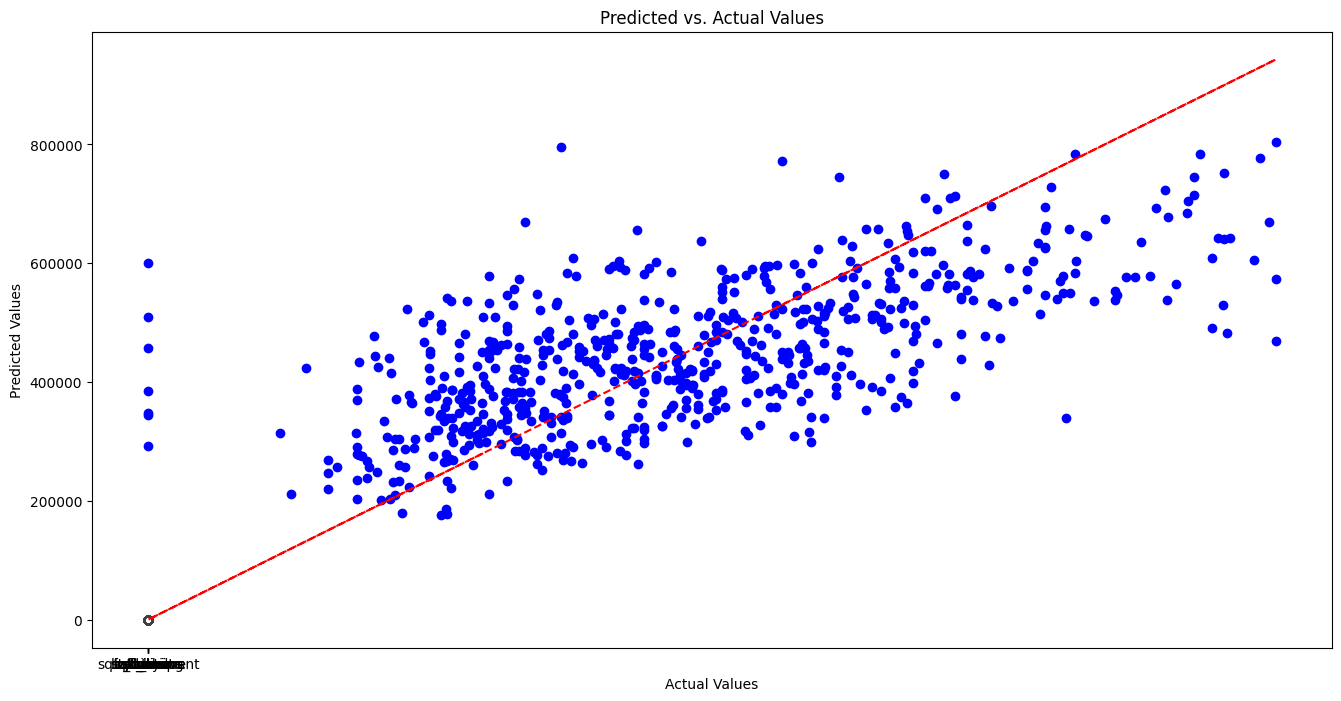

In [94]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

In [478]:
model.coef_

array([ -76156.04606969,   95564.71618993, -528552.05153256,
        -93586.66672483,   71136.30814186,  114036.63978056,
         63683.81045917,  908901.61854422,  437428.19782774,
       -191834.87893238,    8286.72724293,  150806.16767099,
        -89072.52844494])

In [562]:
model.intercept_

443990.17071930127

### RandomForest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Example: Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=200,          # Example: increase number of trees
    max_depth=20,              # Example: control tree depth
    min_samples_split=10,       # Example: require more samples to split
    min_samples_leaf=10,        # Example: require more samples at leaf nodes
    max_features='log2',       # Example: limit features to sqrt(number of features)
    bootstrap=False,            # Default, use bootstrap samples
    criterion='absolute_error'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score = metrics.r2_score(y_test, y_pred)

print(f"r2_score with Random Forest Regression: {r2_score}")

mse = mean_squared_error(y_test,y_pred)
mse


r2_score with Random Forest Regression: 0.6181977814751534


12997499329.263512

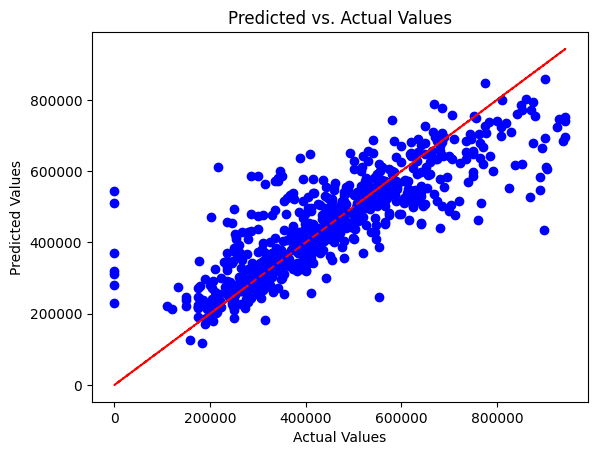

In [96]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

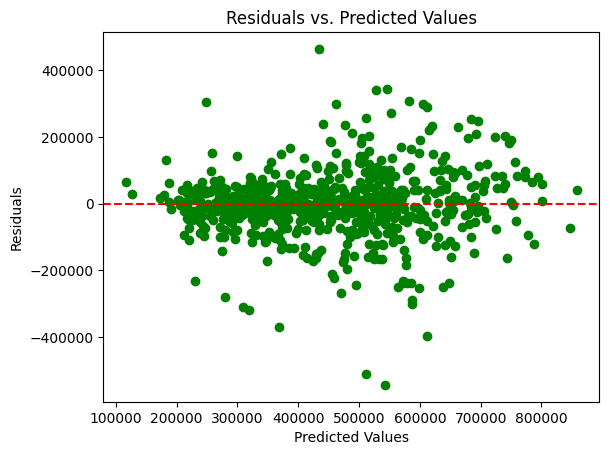

In [97]:
# 3. Residuals vs. Predicted Values (checks for systematic errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--') 
  # Zero residual line
plt.show()

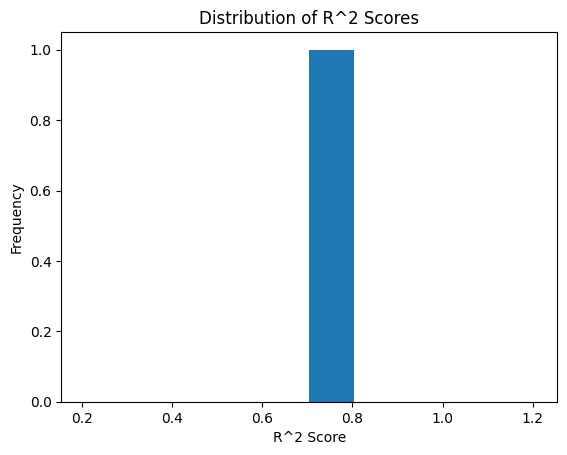

In [98]:
# 1. R-Squared Score Distribution (evaluates model fit)
plt.hist(metrics.r2_score(y_test, y_pred, multioutput='uniform_average'), bins=10)  # Adjust bins as needed
plt.xlabel('R^2 Score')
plt.ylabel('Frequency')
plt.title('Distribution of R^2 Scores')
plt.show()

In [99]:
mse = mean_squared_error(y_test,y_pred)
mse

10070953175.148935

### Gradient Boosting Regressor

In [ ]:
n_estimators=200,
                                learning_rate=0.25,
                                warm_start=True,
                                subsample=1.0

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor                                       #0.28  
model = GradientBoostingRegressor(
    n_estimators=200,          # Increased number of estimators
    learning_rate=0.25,         # Adjusted learning rate
    max_depth=100,              # Increased maximum depth
    subsample=1.0,             # Decreased subsample ratio
    min_samples_split=10,      # Increased samples required for splitting
    min_samples_leaf=10,       # Increased samples required at leaf nodes
    loss='huber',              # Changed loss function
    warm_start=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score = metrics.r2_score(y_test, y_pred)

print(f"r2_score with Gradient Boosting Regressor: {r2_score}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2_score with Gradient Boosting Regressor: 0.6893283436988711
Mean Squared Error: 10576037666.822323


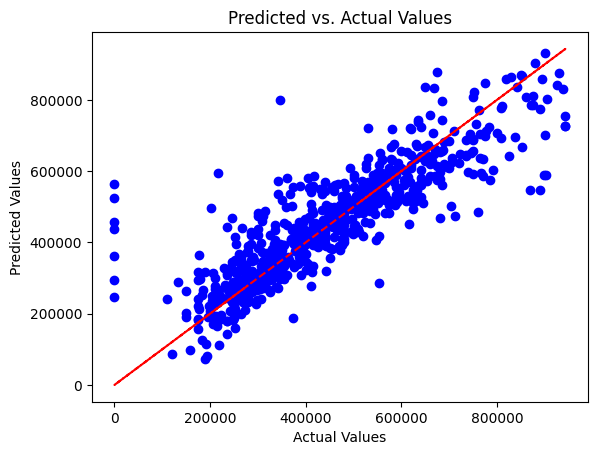

In [101]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

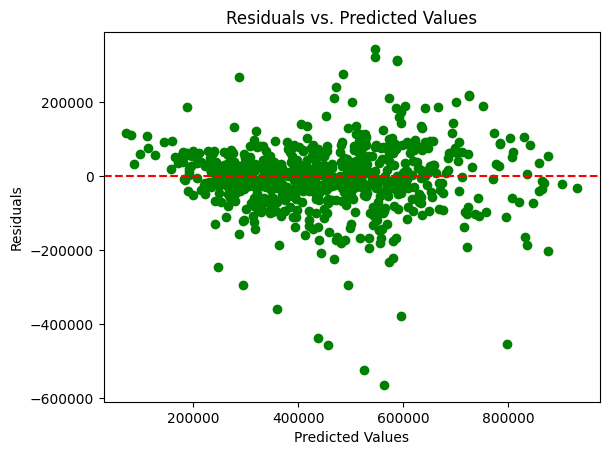

In [102]:
# 3. Residuals vs. Predicted Values (checks for systematic errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--') 
  # Zero residual line
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Save the model to a file using joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [23]:
! pip install Flask==2.2.2

  Using cached werkzeug-3.0.4-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.5 kB ? eta -:--:--
   ----------- --------------------------- 30.7/101.5 kB 262.6 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.5 kB 245.8 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/101.5 kB 297.7 kB/s eta 0:00:01
   ------------------------------- ------- 81.9/101.5 kB 353.1 kB/s eta 0:00:01
   -------------------------------------- 101.5/101.5 kB 364.9 kB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB

In [24]:
%%writefile app.py
import pandas as pd
from sklearn.linear_model import LinearRegression
from flask import Flask, render_template, request

# Load your trained model (replace 'your_model.pkl' with the actual filename)
# Assuming you have saved your model using joblib or pickle
# model = joblib.load('your_model.pkl')
# Or
# with open('your_model.pkl', 'rb') as f:
#     model = pickle.load(f)

# Initialize Flask app
app = Flask(__name__)

# Define the route for the home page
@app.route('/')
def index():
    return render_template('index.html')  # Assuming you have an 'index.html' file

# Define the route for handling predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get input values from the form
    bedrooms = int(request.form['bedrooms'])
    bathrooms = int(request.form['bathrooms'])
    sqft_living = int(request.form['sqft_living'])
    sqft_lot = int(request.form['sqft_lot'])
    floors = int(request.form['floors'])
    view = int(request.form['view'])
    condition = int(request.form['condition'])

    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'sqft_lot': [sqft_lot],
        'floors': [floors],
        'view': [view],
        'condition': [condition]
    })

    # Make a prediction using the loaded model
    prediction = model.predict(input_data)[0]

    # Render the result on the prediction page
    return render_template('index.html', prediction_text=f'Predicted House Price: ${prediction:,.2f}')

if __name__ == '__main__':
    app.run(debug=True)

Writing app.py
